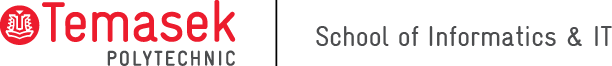
## <center>  Machine Learning for Decision Making (CDA2C05)</center>
### <center>  Practical 2 : Introduction to Tree-Based Algorithm </center>

### <font color=blue> Gentle Instructions: </font>
- The empty code cells are for you to experiment your codes. Feel free to add more cells.
- Replace <font color="Purple"><b> ? </font></b> with correct syntax and use short cut key <i> Shift + Enter </i> to execute your cells.
- Double click on markdown cells to enter your remarks, observations, best practices, etc. Execute your markdown cells to view them properly. 

## 1. Decision Tree
The decision tree algorithm is a widely-used and powerful machine learning technique for solving classification and regression problems. It works by recursively dividing the data based on the values of the input features, with the goal of finding the best feature to split the data at each step. The algorithm considers different criteria for choosing the best feature, such as maximizing the purity of the resulting subgroups or reducing the variance of the predicted value. The process continues until a stopping criterion is reached, such as when all samples in a resulting node belong to the same class(classification) or have the same predicted value (regression). The result is a tree-like structure where each internal node represents a feature and each leaf node represents a predicted class or value. The decision tree algorithm is easy to interpret and can handle both categorical and numerical features, making it a popular choice for many real-world applications.

We've seen an animation on a <b> Decision Tree Regressor </b> in Practical 1. This is how a <b> Decision Tree Classifier </b> works.
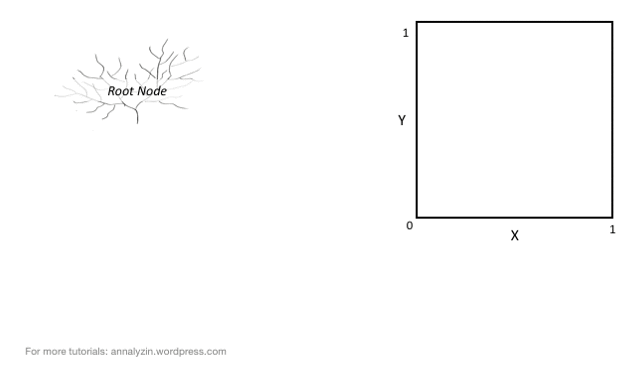

## 2. Decision Tree Regressor (DTR)
We have built a linear regression model on the Laptop Prices dataset. We wondered if another model using another algorithm can outperform it. In this practical we shall find out. 

### 2.1 DTR Vs LR

<div class="alert alert-block alert-info">
<b>We shall modify from Practical 1's codes. </b>
    
    - Still must build the LR
    - But since we are not trying to explain LR, we do NOT have to normalise the data.
    - In fact, from the animations, you should realise that scaling/normalising the numerical attributes will NOT affect the decision tree outcomes. 
</div>

In [1]:
#import all the necessary libraries
#load the dataset as df
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

df=pd.read_csv('Laptop Prices.csv')

In [2]:
#Perform basic EDA
df.head(2)

,ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight (Kg),Price_euros
0,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.1,400.0
1,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3,1495.0


In [3]:
#check for missing values
df.isna().sum()

ID                  0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram (GB)            0
Memory              0
Gpu                 0
OpSys               0
Weight (Kg)         0
Price_euros         0
dtype: int64

In [4]:
#do a df preview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1080 non-null   int64  
 1   Company           1080 non-null   object 
 2   Product           1080 non-null   object 
 3   TypeName          1080 non-null   object 
 4   Inches            1080 non-null   float64
 5   ScreenResolution  1080 non-null   object 
 6   Cpu               1080 non-null   object 
 7   Ram (GB)          1080 non-null   int64  
 8   Memory            1080 non-null   object 
 9   Gpu               1080 non-null   object 
 10  OpSys             1080 non-null   object 
 11  Weight (Kg)       1080 non-null   float64
 12  Price_euros       1080 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 109.8+ KB


In [5]:
#Create two different dfs- one that contain purely categorical data, the other only numerical data
df_obj = df.select_dtypes(include=[object])
df_num = df.select_dtypes(exclude=[object]).drop(columns=['Price_euros', 'ID'])

In [6]:
#Perform features encoding
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
df_obj = df_obj.apply(lambda x: d[x.name].fit_transform(x.astype(str)))

In [7]:
#Set target and inputs
df2 = pd.concat([df_obj , df_num], axis = 1)
X = df2 #set the inputs, cannot include target
y = df['Price_euros'] #set target

In [8]:
#Data partition
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    shuffle = True, random_state=1234)

In [9]:
#Build LR model
from sklearn import linear_model
my_lr = linear_model.LinearRegression()
my_lr.fit(X_train, y_train)
y_pred_lr= my_lr.predict(X_test)

In [10]:
#Build DTR model
from sklearn.tree import DecisionTreeRegressor
my_dtr = DecisionTreeRegressor(random_state=1234).fit(X_train , y_train)
y_pred_dtr = my_dtr.predict(X_test)

In [11]:
#Find residuals for both models
residual_lr=y_test.reset_index(drop=True)-y_pred_lr
residual_dtr=y_test.reset_index(drop=True)-y_pred_dtr

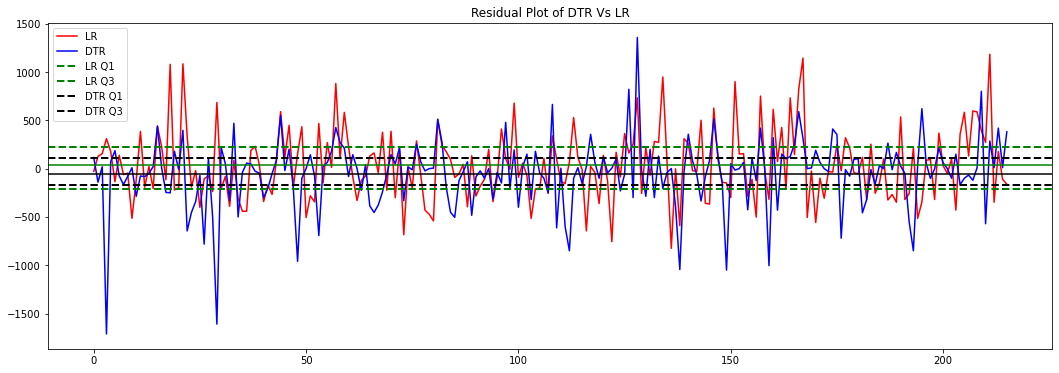

In [12]:
#Visualise them 
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(residual_lr, "red", label = 'LR')
ax.plot(residual_dtr, "blue", label = 'DTR')
""" additional lines for 25th and 75th percentile for DTR
"""
ax.axhline(np.mean(residual_lr), color='green')
ax.axhline(np.percentile(residual_lr, 25), color='green', linestyle='dashed', linewidth=2, label='LR Q1')
ax.axhline(np.percentile(residual_lr, 75), color='green', linestyle='dashed', linewidth=2, label='LR Q3')
ax.axhline(np.mean(residual_dtr), color='k') 
ax.axhline(np.percentile(residual_dtr, 25), color='black', linestyle='dashed', linewidth=2, label='DTR Q1')
ax.axhline(np.percentile(residual_dtr, 75), color='black', linestyle='dashed', linewidth=2, label='DTR Q3')

plt.title('Residual Plot of DTR Vs LR')
ax.legend()
plt.show()

<div class="alert alert-block alert-info">
<b>Which is better? LR or DTR?</b>
    
    - Are we able to tell visually?
    - If not, how?  
</div>

Your takeaways:
1.  Both LR and DTR are not very reliable as they have very large residuals - some predictions are wrong by over $500.
2.  DTR is slightly better as the IQR is smaller than the IQR of LR which means the predictions are closer towards the actual value on average.
3.  However, DTR has a possibility to make extreme predictions way beyond the IQR.


### 2.2 Multivariate analysis to support

<div class="alert alert-block alert-info">
<b>Are there particular types of laptop that both DTR and LR perform poorly?</b>
</div>

In [13]:
index=pd.DataFrame(y_test).index

In [14]:
decoded_X_test=df.iloc[index]
decoded_X_test

,ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram (GB),Memory,Gpu,OpSys,Weight (Kg),Price_euros
772,927,Acer,Aspire E5-575,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.400,499.0
62,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8,1TB HDD,AMD Radeon RX 560,Windows 10,2.450,699.0
230,296,Asus,FX753VD-GC071T (i7-7700HQ/8GB/1TB/GeForce,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.000,1187.0
679,814,HP,EliteBook 820,Netbook,12.5,1366x768,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.260,1389.0
241,309,Asus,GL553VE-FY082T (i7-7700HQ/8GB/1TB,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.500,1265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,969,Dell,Alienware 17,Gaming,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.360,3154.0
987,1203,Asus,Rog GL552VW-DM201T,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.591,909.0
740,889,Dell,Vostro 5568,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.180,912.5
438,533,Lenovo,IdeaPad 320-15IKB,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.200,799.0


#### Plot 1

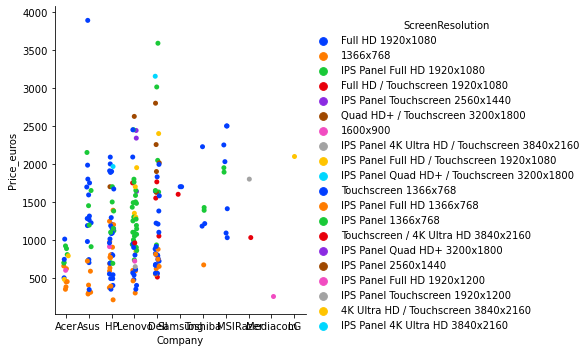

In [15]:
sns.catplot(x="Company", y="Price_euros", hue="ScreenResolution", data=decoded_X_test, palette='bright')
plt.show()

#### Plot 2

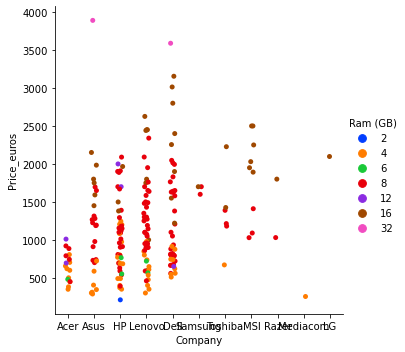

In [16]:
sns.catplot(x="Company", y="Price_euros", hue="Ram (GB)", data=decoded_X_test, palette='bright')
plt.show()

#### Plot 3

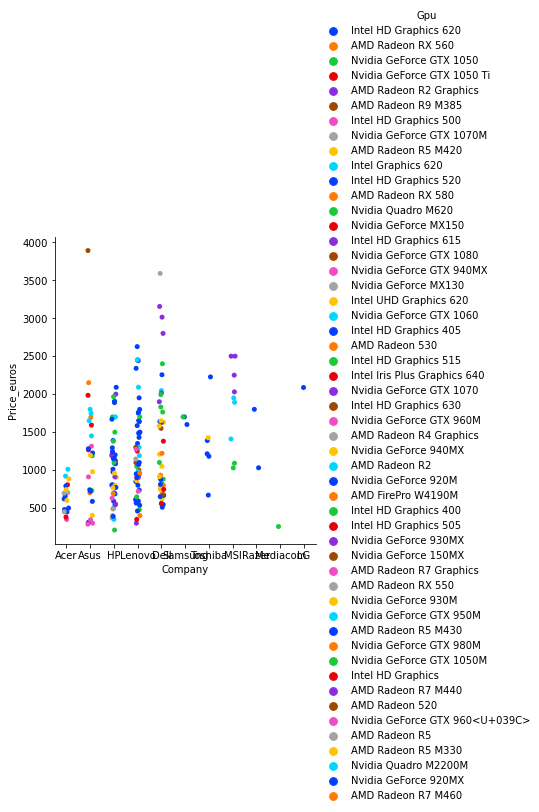

In [17]:
sns.catplot(x="Company", y="Price_euros", hue="Gpu", data=decoded_X_test, palette='bright')
plt.show()

<div class="alert alert-block alert-danger">
<b>After exploration, what are your take-aways?</b>
</div>

1. Acer laptop are cheaper in general
2. The higher the RAM, the more expensive the laptop
3. Asus has the most expensive laptop

### 2.3 Anything beyond MSE and R2?

What we observed in the residual plot was that there were times where the LR model over/under estimate slightly more than DTR model. According to our prior DSES understanding of using MSE (mean square error), we can guess that MSE for LR would be worse off than that of DTR as additional difference will be amplified with the squaring. However they may have comparable performance when we use another metric MAE (mean absolute error) which is only concern about how close is the prediction to the actual, without considering over/under estimation.

A residual of 500 may seem a poor prediction for laptop price. However, the same residual of 500 is actually very good prediction for HDB price (where the actual price is in the order of hundred thousands) as the percentage difference is only 0.1% for a $500k house.

<div class="alert alert-block alert-info">
<b>Discuss with your peers, under what scenarios do we use MSE, R2, MAE, MAPE, etc to measure performance of a regression model?</b>
    
    - Describe e.g. what type/range of value of target, etc.
    - What other metrics apart from these 4?
</div>

Your takeaways:
1. MSE penalizes larger errors more heavily as its sensitive to outliers. Useful when target has wide range of values. MSE is suitable when you need to account for the magnitude of errors, but it might not be robust to outliers.

2. MAE not sensitive to outliers, treats all error equally. Robust and doesn't significantly get impacted by outliers.

3. MAPE (Mean Absolute Percentage Error) percentage difference between predicted and actual.

4. R2 to understand variance in the dependent var that can explain by the independent var. Assess the goodness of fit of your regression model and the proportion of variance it explains.

### 2.4 Limitations of DT
There are several ways to visualise the DTR model in terms of the leave and nodes in python. 

#### Method 1

In [18]:
from sklearn import tree
text_representation = tree.export_text(my_dtr,feature_names=list(X_train.columns), max_depth=3)
print(text_representation)

|--- Ram (GB) <= 14.00
|   |--- Ram (GB) <= 7.00
|   |   |--- Cpu <= 51.50
|   |   |   |--- Cpu <= 40.00
|   |   |   |   |--- truncated branch of depth 13
|   |   |   |--- Cpu >  40.00
|   |   |   |   |--- truncated branch of depth 12
|   |   |--- Cpu >  51.50
|   |   |   |--- Weight (Kg) <= 1.34
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- Weight (Kg) >  1.34
|   |   |   |   |--- truncated branch of depth 13
|   |--- Ram (GB) >  7.00
|   |   |--- Weight (Kg) <= 1.49
|   |   |   |--- Company <= 2.00
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- Company >  2.00
|   |   |   |   |--- truncated branch of depth 14
|   |   |--- Weight (Kg) >  1.49
|   |   |   |--- Gpu <= 85.50
|   |   |   |   |--- truncated branch of depth 26
|   |   |   |--- Gpu >  85.50
|   |   |   |   |--- truncated branch of depth 7
|--- Ram (GB) >  14.00
|   |--- Ram (GB) <= 28.00
|   |   |--- Gpu <= 64.50
|   |   |   |--- Product <= 357.00
|   |   |   |   |--- truncated branch o

<div class="alert alert-block alert-info">
<b>How do we visualise the typical vertical tree diagram starting with the root node on top?</b>
    
    Discuss with your peers and show your tutor.  
</div>

### Method 2

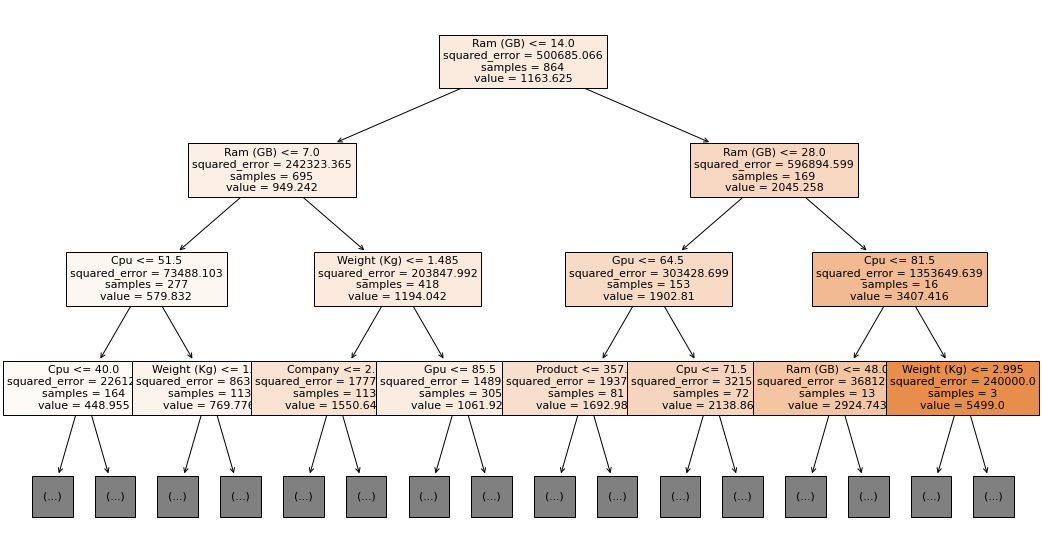

In [19]:
plt.figure(figsize=(18,10))

tree.plot_tree(my_dtr, feature_names=list(X_train.columns), max_depth=3, filled=True, fontsize=11)

plt.show()

<div class="alert alert-block alert-info">
<b>Do you like the DT algorithm?</b>
    
    - What do you think are the advantages of DT? 
    - What are the disadvantages?
</div>

Your takeaway:
1.  DTR can be overfitted if its too complicated and has too many branches.
2.  DTR should be generalized to prevent overfitting.
3.  DTR could be pruned using visualizations by identifying patterns.
4.  DTR is a logical step by step process and is easy to understand and interpret.
5. DTR is not highly influenced by outliers unlike models like LR.

## 3. Summary
We have successfully performed the following:
- build a DTR
- visualise a DTR
- understand the pros and cons of DT algorithms. 

### <center>Remember to save your work <center>

We shall save these two models and dfs for the next practical.

In [20]:
import joblib
joblib.dump((my_lr, my_dtr), 'models.joblib')

['models.joblib']

In [21]:
X_train.to_pickle('Xtrain.pkl')
X_test.to_pickle('Xtest.pkl')
y_train.to_pickle('ytrain.pkl')
y_test.to_pickle('ytest.pkl')